In [84]:
# %%capture
# #Install tumor-tcell from one directory up
# !pip install ../

In [85]:
from bigraph_viz import plot_bigraph, plot_multitimestep, convert_vivarium_composite
from bigraph_viz.dict_utils import replace_regex_recursive
from tumor_tcell.experiments.main import large_experiment
from vivarium.core.engine import pf
from vivarium.core.composer import Composite

In [113]:
plot_settings = {'remove_process_place_edges': True}
save_images = False
if save_images:
    plot_settings.update({'out_dir': 'out','dpi': '250'})
    
plot_settings2={}
if save_images:
    plot_settings2.update({
        'out_dir': 'out',
        'dpi': '250'
    })

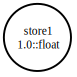

In [104]:
typed_store_spec = {
    'store1': {
        '_value': 1.0, 
        '_type': 'float',
    },
}
plot_bigraph(typed_store_spec, **plot_settings, show_values=True, show_types=True, filename='store')

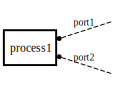

In [88]:
process_spec = {
    '_type': 'python_process',
    'process1': {
        '_type': 'edge',
        '_ports': {
            'port1': 'Any',
            'port2': 'Any',
        },
    },
}
plot_bigraph(process_spec, **plot_settings, rankdir='RL', filename='process')

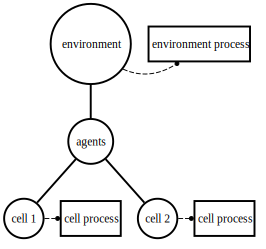

In [114]:
agent_spec = {
    'cell process': {
        'wires': {
            'port1': [],
        }
    }
}
abm_spec = {
    'environment': {
        'agents': {
            'cell 1': agent_spec,
            'cell 2': agent_spec,
        },
    },
    'environment process': {
        'wires': {
            'port1': 'environment',
        }
    }
}
node_groups = [
    [('environment',), ('environment process',)],
    [('environment', 'agents', 'cell 1'), ('environment', 'agents', 'cell 1', 'cell process',)],
    [('environment', 'agents', 'cell 2'), ('environment', 'agents', 'cell 2', 'cell process',)],
]
plot_bigraph(abm_spec, **plot_settings, node_groups=node_groups, port_labels=False, filename='abm_composite')

In [106]:
help(plot_bigraph)

Help on function plot_bigraph in module bigraph_viz.plot:

plot_bigraph(bigraph_schema, size='16,10', node_label_size='12pt', show_values=False, show_types=False, collapse_processes=False, port_labels=True, port_label_size='10pt', rankdir='TB', node_border_colors=None, node_fill_colors=None, node_groups=False, remove_nodes=None, invisible_edges=False, mark_top=False, remove_process_place_edges=False, print_source=False, dpi='70', file_format='png', out_dir=None, filename=None)
    Plot a bigraph from bigraph schema.
    
    Args:
        bigraph_schema (dict): The bigraph schema dict that will be plotted.
        size (str, optional): The size of the output figure (example: '16,10'). Default is '16,10'.
        node_label_size (str, optional): The font size for the node labels. Default is None.
        show_values (bool, optional): Display on value info in node label. Default is False.
        show_types (bool, optional): Display on type info in node label. Default is False.
        c

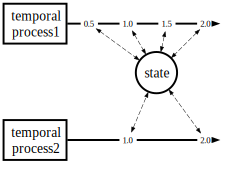

In [90]:
multitimestep_spec = {
    'temporal process2': {
        '_ports': {'port1': 'Any'},
        'wires': {'port1': 'state'},
        '_sync_step': 1.0,
    },
    'temporal process1': {
        '_ports': {'port1': 'Any'},
        'wires': {'port1': 'state'},
        '_sync_step': 0.5,
    },
}
multitimestep_spec = replace_regex_recursive(multitimestep_spec)
plot_multitimestep(multitimestep_spec, total_time=2.0, **plot_settings2, filename='multitimestep')

In [91]:
data, experiment = large_experiment(
        n_tcells=1,
        n_tumors=1,
        n_dendritic=1,
        n_tcells_lymph_node=0,
        tumors_state_PDL1n=0.5,
        tcells_total_PD1n=8,
        dendritic_state_active=0.5,
        lymph_nodes=True,
        total_time=0, 
        field_molecules=['IFNg', 'tumor_debris'],
        return_experiment=True,
    )

Initializing experiment tumor_tcell_20231017.093013


0it [00:00, ?it/s]

Completed in 0.00 seconds


In [92]:
composite = Composite(
    state=experiment.state.get_value(), 
    processes=experiment.state.get_processes(), 
    steps=experiment.state.get_steps(), 
    topology=experiment.state.get_topology(), 
    flow=experiment.state.get_flow(),
)
del composite['_schema']
del composite['state']

In [93]:
# print(pf(composite))

In [94]:
abm_experiment_spec = convert_vivarium_composite(composite)

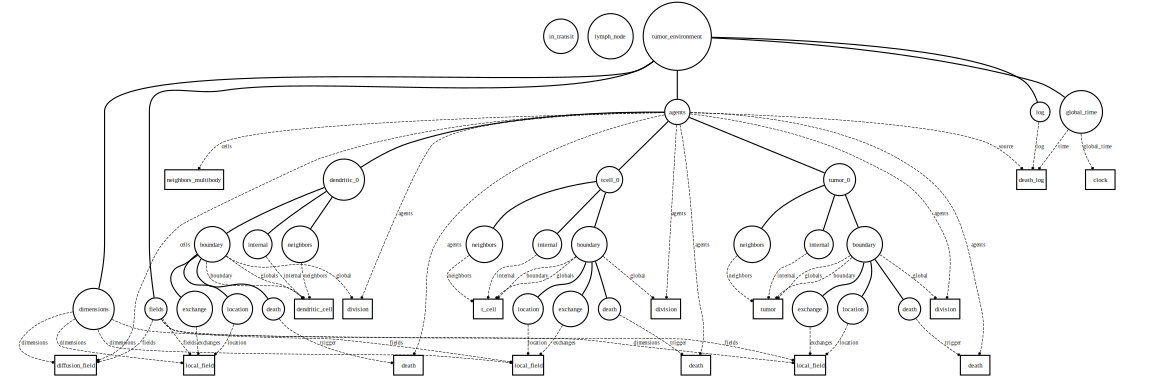

In [95]:
plot_bigraph(abm_experiment_spec, 
             **plot_settings,
             filename='abm_experiment',
            )

In [96]:
tumor_environment_spec = bigraph_spec['tumor_environment']
lymph_node_spec = bigraph_spec['lymph_node']
in_transit_spec = bigraph_spec['in_transit']

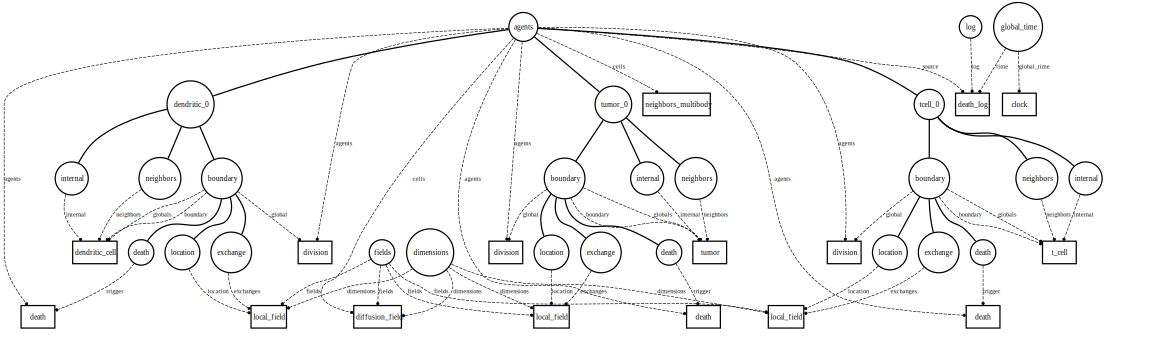

In [97]:
plot_bigraph(tumor_environment_spec, 
             **plot_settings,
             filename='tumor_environment',
            )

In [98]:
plot_bigraph(lymph_node_spec,
             # dpi='500',
             # out_dir='out',
             # filename='tumor_tcell_bigraph',
            )